# 1️⃣ Imports and Setup

In [1]:
!pip install gensim numpy scikit-learn matplotlib tqdm nltk --quiet
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2️⃣ Load Pre-trained Embedding Model

In [3]:
model = api.load('glove-wiki-gigaword-50')
print('Model loaded. Vocabulary size:', len(model))
print('Vector size:', model.vector_size)

Model loaded. Vocabulary size: 400000
Vector size: 50


# 3️⃣ Explore Word Vectors and Similarities

In [4]:
word = 'king'
vector = model[word]
print(f"Vector for '{word}' (first 10 dims):\n", vector[:10])

Vector for 'king' (first 10 dims):
 [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]


In [5]:
pairs = [('king', 'queen'), ('king', 'man'), ('computer', 'keyboard')]
for w1, w2 in pairs:
    sim = model.similarity(w1, w2)
    print(f"Similarity({w1}, {w2}) = {sim:.3f}")

Similarity(king, queen) = 0.784
Similarity(king, man) = 0.531
Similarity(computer, keyboard) = 0.577


# 4️⃣ Find Most Similar Words

In [6]:
for w in ['computer', 'love', 'city']:
    print(f"\nTop similar words to '{w}':")
    for s in model.most_similar(w, topn=5):
        print(f"  {s[0]:<15} {s[1]:.3f}")


Top similar words to 'computer':
  computers       0.917
  software        0.881
  technology      0.853
  electronic      0.813
  internet        0.806

Top similar words to 'love':
  dream           0.843
  life            0.840
  dreams          0.840
  loves           0.836
  me              0.835

Top similar words to 'city':
  town            0.869
  downtown        0.853
  where           0.853
  cities          0.850
  area            0.832


# 5️⃣ Simple Document Embedding

In [7]:
def embed_document(doc):
    tokens = [t.lower() for t in doc.split() if t in model]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean([model[t] for t in tokens], axis=0)

doc = "The queen rules the country"
vec = embed_document(doc)
print("Document vector shape:", vec.shape)
print("First 10 values:", vec[:10])

Document vector shape: (50,)
First 10 values: [-0.0739475   0.41010252 -0.69460255 -0.01441925 -0.02078175  0.16054074
 -0.2714275  -0.06505749  0.09718994 -0.51314247]


# 6️⃣ Visualize Embeddings (PCA and t-SNE)

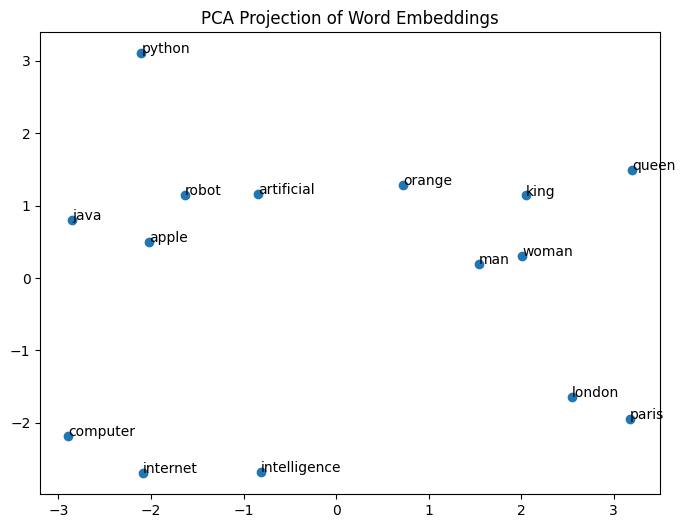

In [8]:
words = ['king','queen','man','woman','computer','internet','python','java','apple','orange','london','paris','robot','artificial','intelligence']
vecs = np.array([model[w] for w in words if w in model])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(vecs)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
for i, w in enumerate(words):
    plt.text(X_pca[i,0], X_pca[i,1], w)
plt.title("PCA Projection of Word Embeddings")
plt.show()

In [9]:
# t-SNE (more nonlinear, shows clusters)
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, init='pca')
X_tsne = tsne.fit_transform(vecs)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1])
for i, w in enumerate(words):
    plt.text(X_tsne[i,0], X_tsne[i,1], w)
plt.title("t-SNE Projection of Word Embeddings")
plt.show()

TypeError: TSNE.__init__() got an unexpected keyword argument 'n_iter'

# 7️⃣ Train a Small Word2Vec Model from Scratch

In [10]:
from gensim.models import Word2Vec
sentences = [
    ['king','queen','royal','palace'],
    ['man','woman','child','family'],
    ['computer','python','java','code','software'],
    ['apple','orange','banana','fruit'],
    ['paris','london','city','capital','europe']
]

model2 = Word2Vec(sentences, vector_size=50, window=3, min_count=1, epochs=100)
print(model2.wv.most_similar('king'))

[('palace', 0.20384655892848969), ('apple', 0.11218303442001343), ('royal', 0.07342218607664108), ('computer', 0.07312982529401779), ('woman', 0.05855375528335571), ('capital', 0.05455827713012695), ('child', 0.05011996626853943), ('code', 0.012080361135303974), ('fruit', 0.007412523031234741), ('man', 0.004551179241389036)]
